In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc



In [ ]:

# Read the parquet file
df = pd.read_parquet('/content/sample_data/cidds-001-externalserver.parquet')

# Convert to CSV
df.to_csv('cidds.csv', index=False)

In [ ]:
data=pd.read_csv('/content/cidds.csv')

In [ ]:
data

,duration,proto,packets,bytes,flows,tcp_urg,tcp_ack,tcp_psh,tcp_rst,tcp_syn,tcp_fin,tos,label,attack_type,attack_id
0,0.000,TCP,1,46.0,1,0,0,0,0,1.0,0.0,0,suspicious,benign,0
1,0.000,TCP,1,40.0,1,0,1,0,1,0.0,0.0,0,suspicious,benign,0
2,0.001,TCP,1,46.0,1,0,0,0,0,1.0,0.0,0,suspicious,benign,0
3,0.001,TCP,1,40.0,1,0,1,0,1,0.0,0.0,0,suspicious,benign,0
4,0.018,UDP,1,76.0,1,0,0,0,0,0.0,0.0,0,suspicious,benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204487,86554.180,TCP,15285,1100000.0,1,0,1,1,0,1.0,0.0,0,normal,benign,0
204488,81221.590,TCP,8261,22700000.0,1,0,1,1,0,1.0,0.0,0,normal,benign,0
204489,81221.590,TCP,15354,4800000.0,1,0,1,1,0,1.0,0.0,0,normal,benign,0
204490,91008.760,TCP,10810,8600000.0,1,0,1,1,0,1.0,0.0,0,normal,benign,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204492 entries, 0 to 204491
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   duration     204492 non-null  float64
 1   proto        204492 non-null  object 
 2   packets      204492 non-null  int64  
 3   bytes        204492 non-null  float64
 4   flows        204492 non-null  int64  
 5   tcp_urg      204492 non-null  int64  
 6   tcp_ack      204492 non-null  int64  
 7   tcp_psh      204492 non-null  int64  
 8   tcp_rst      204492 non-null  int64  
 9   tcp_syn      204492 non-null  float64
 10  tcp_fin      204492 non-null  float64
 11  tos          204492 non-null  int64  
 12  label        204492 non-null  object 
 13  attack_type  204492 non-null  object 
 14  attack_id    204492 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 23.4+ MB


In [ ]:
data.columns

Index(['duration', 'proto', 'packets', 'bytes', 'flows', 'tcp_urg', 'tcp_ack',
       'tcp_psh', 'tcp_rst', 'tcp_syn', 'tcp_fin', 'tos', 'label',
       'attack_type', 'attack_id'],
      dtype='object')

In [ ]:
data.dtypes

duration       float64
proto           object
packets          int64
bytes          float64
flows            int64
tcp_urg          int64
tcp_ack          int64
tcp_psh          int64
tcp_rst          int64
tcp_syn        float64
tcp_fin        float64
tos              int64
label           object
attack_type     object
attack_id        int64
dtype: object

In [ ]:
data=data.replace(np.nan,0)

In [ ]:
# check missing values in variables

data.isnull().sum()

duration       0
proto          0
packets        0
bytes          0
flows          0
tcp_urg        0
tcp_ack        0
tcp_psh        0
tcp_rst        0
tcp_syn        0
tcp_fin        0
tos            0
label          0
attack_type    0
attack_id      0
dtype: int64

In [ ]:
data = data.drop(columns=['label', 'attack_id'])

In [ ]:
data.columns

Index(['duration', 'proto', 'packets', 'bytes', 'flows', 'tcp_urg', 'tcp_ack',
       'tcp_psh', 'tcp_rst', 'tcp_syn', 'tcp_fin', 'tos', 'attack_type'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204492 entries, 0 to 204491
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   duration     204492 non-null  float64
 1   proto        204492 non-null  object 
 2   packets      204492 non-null  int64  
 3   bytes        204492 non-null  float64
 4   flows        204492 non-null  int64  
 5   tcp_urg      204492 non-null  int64  
 6   tcp_ack      204492 non-null  int64  
 7   tcp_psh      204492 non-null  int64  
 8   tcp_rst      204492 non-null  int64  
 9   tcp_syn      204492 non-null  float64
 10  tcp_fin      204492 non-null  float64
 11  tos          204492 non-null  int64  
 12  attack_type  204492 non-null  object 
dtypes: float64(4), int64(7), object(2)
memory usage: 20.3+ MB


In [ ]:
data['proto'] = data['proto'].astype('object')
data['proto'] = data['proto'].str.strip()
data['proto'] =data['proto'].astype('category')
data['proto'] = data['proto'].cat.codes
data['proto'] = data['proto'].astype(np.int32)

In [ ]:
data['attack_type'] = data['attack_type'].astype('object')
data.loc[data['attack_type'] != 'benign', 'attack_type'] = 1
data.loc[data['attack_type'] == 'benign', 'attack_type'] = 0
print(data['attack_type'].value_counts())
data['attack_type'] = data['attack_type'].astype(dtype=np.int32)

0    201391
1      3101
Name: attack_type, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204492 entries, 0 to 204491
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   duration     204492 non-null  float64
 1   proto        204492 non-null  int32  
 2   packets      204492 non-null  int64  
 3   bytes        204492 non-null  float64
 4   flows        204492 non-null  int64  
 5   tcp_urg      204492 non-null  int64  
 6   tcp_ack      204492 non-null  int64  
 7   tcp_psh      204492 non-null  int64  
 8   tcp_rst      204492 non-null  int64  
 9   tcp_syn      204492 non-null  float64
 10  tcp_fin      204492 non-null  float64
 11  tos          204492 non-null  int64  
 12  attack_type  204492 non-null  int32  
dtypes: float64(4), int32(2), int64(7)
memory usage: 18.7 MB


In [ ]:
X = data.drop(['attack_type'], axis=1)
y = data['attack_type']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

In [ ]:

# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)


In [ ]:
# fit the model

rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [ ]:
# Predict the Test set results

y_pred = rfc.predict(X_test)

In [ ]:
accuracy_rfc =accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of rfc: ',accuracy_rfc )

Model accuracy score of rfc:  0.9981921372790185


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm_rfc)

Confusion matrix

 [[66419    76]
 [   46   942]]


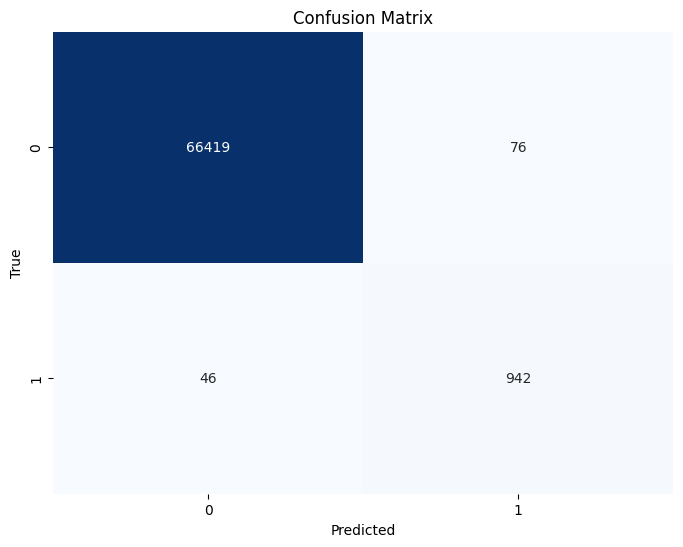

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66495
           1       0.93      0.95      0.94       988

    accuracy                           1.00     67483
   macro avg       0.96      0.98      0.97     67483
weighted avg       1.00      1.00      1.00     67483



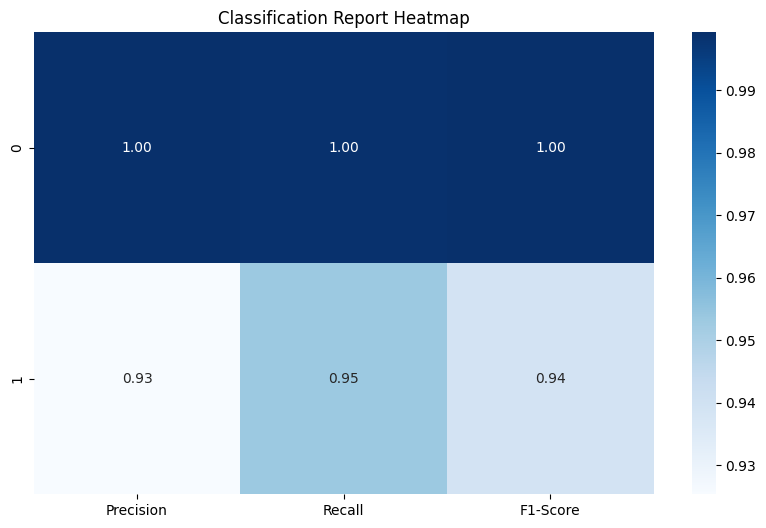

In [ ]:
# Plotting a heatmap for precision, recall, and F1-score
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, and F1-score for each class
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'], class_report[class_name]['f1-score']] for class_name in class_names]

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'], yticklabels=class_names, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

AUC: 0.98


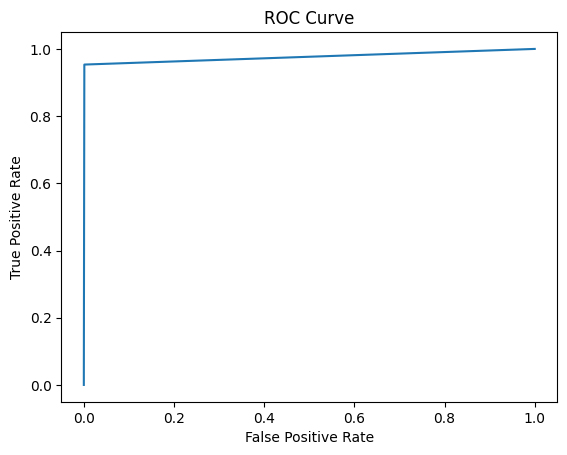

In [ ]:
# Calculate the ROC Precision, Recall, and F1-Score
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

# Calculate the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# plot the roc curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

SVM

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters
svc=SVC()




In [ ]:
# fit classifier to training set
svc.fit(X_train,y_train)





SVC()

In [ ]:


# make predictions on test set
y_pred=svc.predict(X_test)

In [ ]:
accuracy_svc=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of svc: ',accuracy_svc)

Model accuracy score of svc:  0.9853592756694278


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_svc = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm_svc)

Confusion matrix

 [[66495     0]
 [  988     0]]


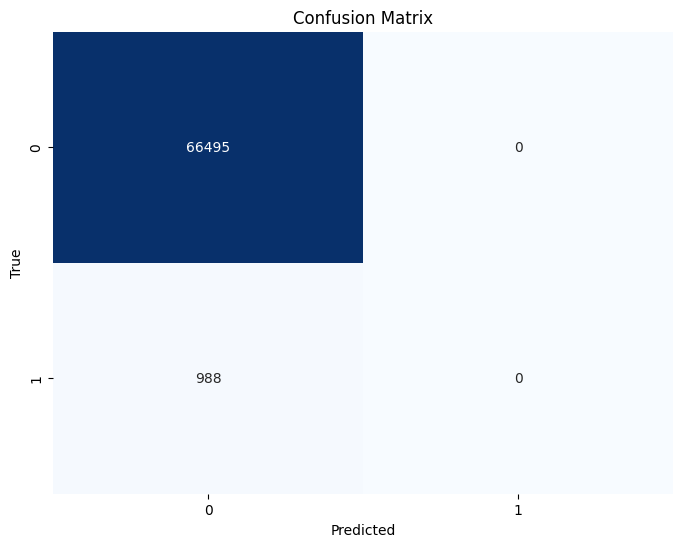

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     66495
           1       0.00      0.00      0.00       988

    accuracy                           0.99     67483
   macro avg       0.49      0.50      0.50     67483
weighted avg       0.97      0.99      0.98     67483



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


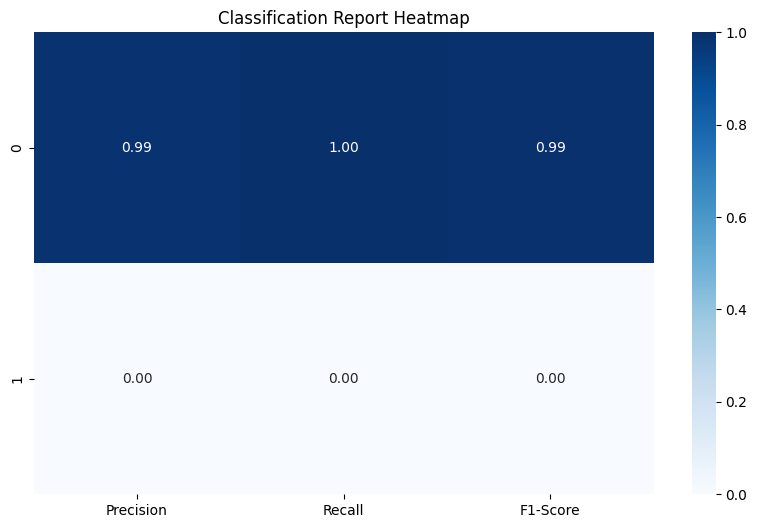

In [ ]:
# Plotting a heatmap for precision, recall, and F1-score
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, and F1-score for each class
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'], class_report[class_name]['f1-score']] for class_name in class_names]

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'], yticklabels=class_names, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

AUC: 0.50


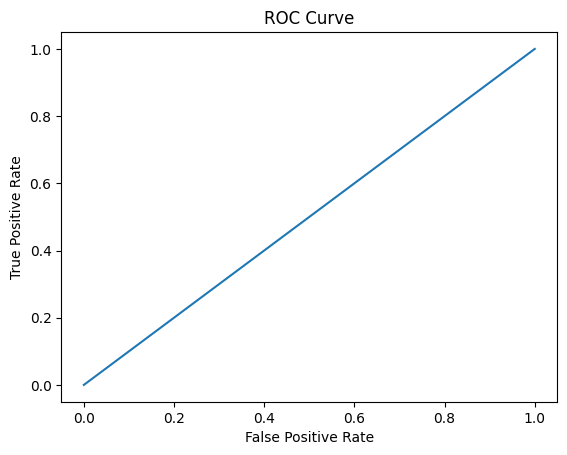

In [ ]:
# Calculate the ROC Precision, Recall, and F1-Score
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

# Calculate the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# plot the roc curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

DTC

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

dtc = DecisionTreeClassifier(criterion='gini', random_state=0)


In [ ]:
# fit the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
accuracy_dtc = accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score DTC: ',accuracy_dtc)

Model accuracy score DTC:  0.9979105848880458


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_dtc = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm_dtc)

Confusion matrix

 [[66417    78]
 [   63   925]]


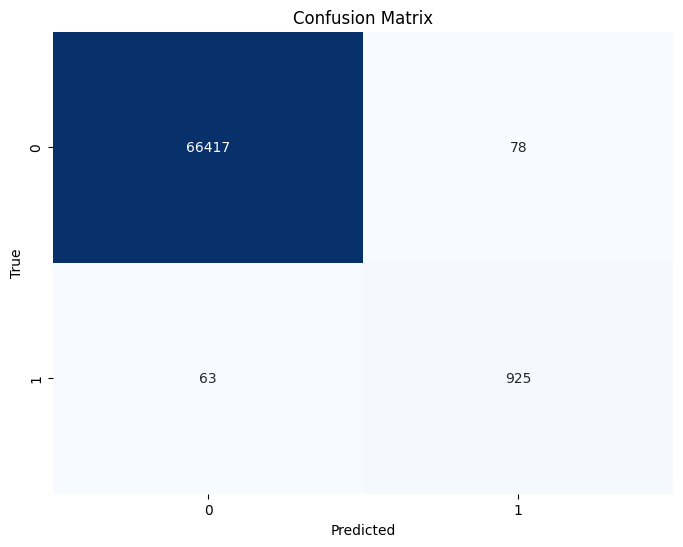

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66495
           1       0.92      0.94      0.93       988

    accuracy                           1.00     67483
   macro avg       0.96      0.97      0.96     67483
weighted avg       1.00      1.00      1.00     67483



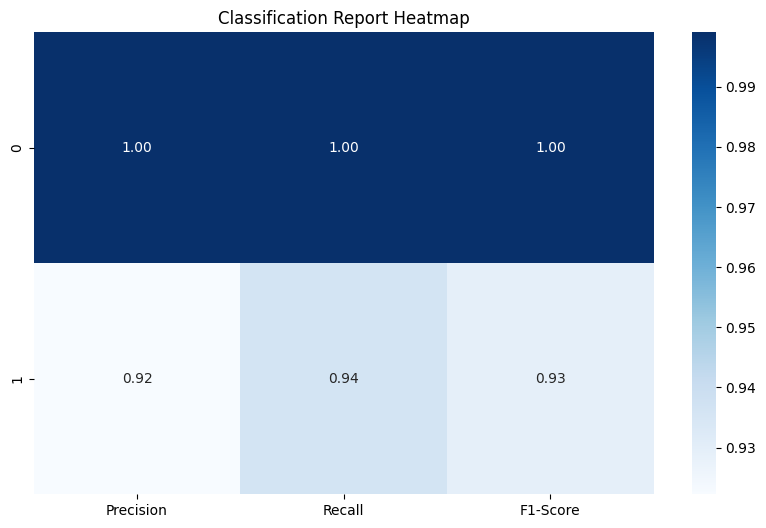

In [ ]:
# Plotting a heatmap for precision, recall, and F1-score
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, and F1-score for each class
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'], class_report[class_name]['f1-score']] for class_name in class_names]

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'], yticklabels=class_names, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

AUC: 0.97


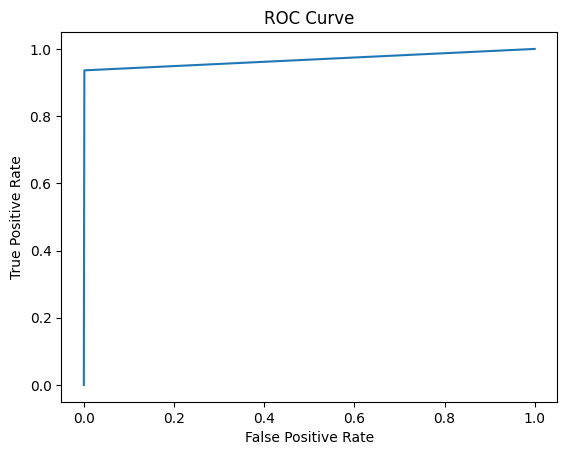

In [ ]:
# Calculate the ROC Precision, Recall, and F1-Score
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

# Calculate the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# plot the roc curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()